**Covid-19 Data Analysis and prediction Using Machine Learning Models**

#Current date and time

In [ ]:
from datetime import datetime
print(datetime.now())

2022-07-06 18:22:10.270961


# Import necessary libraies

In [ ]:
# for dataset handeling and calculations
import numpy as np
import pandas as pd

# for basic visualizations
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
%matplotlib inline

# for advanced visualizations
import seaborn as sns

# for interactive visualizations
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# to hide warnings
import warnings
warnings.filterwarnings('ignore')

# for date and time operations
from datetime import datetime,timedelta

# for file and folder operations
import os

################
import plotly.figure_factory as ff
import folium
import math
import random



#color pallette
cnf ='#393e46'
dth ='#ff2e63'
rec = '#21bf73'
act = '#fe9801'
################

# for modelling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
# from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)



# Path to the files directory

In [ ]:
#Data Set link : https://github.com/laxmimerit/Covid-19-Preprocessed-Dataset
#cloining github Reposetity
!git clone https://github.com/laxmimerit/Covid-19-Preprocessed-Dataset.git

fatal: destination path 'Covid-19-Preprocessed-Dataset' already exists and is not an empty directory.


# Read datasets

In [ ]:
#covid_19_data_cleaned
df = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/covid_19_data_cleaned.csv',parse_dates=['Date'])

#country_daywise
country_daywise = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/country_daywise.csv',parse_dates=['Date'])

#countrywise
countrywise = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/countrywise.csv')

#daywise
daywise = pd.read_csv('Covid-19-Preprocessed-Dataset/preprocessed/daywise.csv',parse_dates=['Date'])


# Checking Shape,Null values, Data-type

In [ ]:
print("----------covid_19_data_cleaned---------")
print("Size/Shape of the  dataset :",df.shape)
print("Checking for null values :",df.isnull().sum())
print("Checking Data-type :",df.dtypes)

print("----------country_daywise---------")
print("Size/Shape of the  dataset :",country_daywise.shape)
print("Checking for null values :",country_daywise.isnull().sum())
print("Checking Data-type :",country_daywise.dtypes)

print("----------countrywise---------")
print("Size/Shape of the  dataset :",countrywise.shape)
print("Checking for null values :",countrywise.isnull().sum())
print("Checking Data-type :",countrywise.dtypes)

print("----------daywise---------")
print("Size/Shape of the  dataset :",daywise.shape)
print("Checking for null values :",daywise.isnull().sum())
print("Checking Data-type :",daywise.dtypes)


----------covid_19_data_cleaned---------
Size/Shape of the  dataset : (259572, 9)
Checking for null values : Date                   0
Province/State    178400
Country                0
Lat                    0
Long                   0
Confirmed              0
Recovered              0
Deaths                 0
Active                 0
dtype: int64
Checking Data-type : Date              datetime64[ns]
Province/State            object
Country                   object
Lat                      float64
Long                     float64
Confirmed                  int64
Recovered                  int64
Deaths                     int64
Active                     int64
dtype: object
----------country_daywise---------
Size/Shape of the  dataset : (176911, 9)
Checking for null values : Date             0
Country          0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New Cases        0
New Recovered    0
New Deaths       0
dtype: int64
Checking Data-type : Date         

# Drop the column containing null values

In [ ]:
#Dropping the column
# df.drop(["Date"],1,inplace=True)
# df.isnull().sum()

# Top 10 countries with confirmed cases  with bar plot

In [ ]:
# top_10_confirmed = countrywise.sort_values(by='Confirmed', ascending=False).head(10)
# top_10_confirmed

# saving the dataframe
# top_10_confirmed.to_csv('top_10_confirmed.csv')

In [ ]:
# top_10_confirmed country names
# top_10_confirmed['Country']

In [ ]:
# fig = px.bar(top_10_confirmed.sort_values(by='Confirmed', ascending=True),
#              x="Confirmed", y="Country",
#              title='Confirmed Cases', text='Confirmed',
#              template='plotly_dark', orientation='h')

# fig.update_traces(marker_color='#3498db', textposition='outside')

# # plot(fig)
# fig.show()

# Top 10  Countries with respect to Deaths Cases

In [ ]:
top_10_deaths = countrywise.sort_values(by='Deaths', ascending=False).head(10)
top_10_deaths

,Country,Confirmed,Deaths,Recovered,Active,New Cases,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Population,Cases / Million People,Confirmed last week,1 week change,1 week % increase
184,US,87843561,1017848,0,86825713,4938,1.16,0.0,0.0,330541757,265756.0,87043484,800077,0.92
24,Brazil,32490422,671911,0,31818511,18575,2.07,0.0,0.0,422706534,76863.0,32023166,467256,1.46
80,India,43518564,525223,0,42993341,16135,1.21,0.0,0.0,2751341248,15817.0,43407046,111518,0.26
146,Russia,18170656,373552,0,17797104,3053,2.06,0.0,0.0,292579178,62105.0,18150010,20646,0.11
117,Mexico,6089600,325788,0,5763812,30911,5.35,0.0,0.0,255584572,23826.0,5962615,126985,2.13
140,Peru,3637529,213551,0,3423978,2611,5.87,0.0,0.0,65597846,55452.0,3613464,24065,0.67
188,United Kingdom,22941362,181093,0,22760269,2,0.79,0.0,0.0,135034319,169893.0,22786805,154557,0.68
86,Italy,18768871,168545,0,18600326,72917,0.90,0.0,0.0,120822834,155342.0,18234242,534629,2.93
81,Indonesia,6093917,156749,0,5937168,1614,2.57,0.0,0.0,273523621,22279.0,6080451,13466,0.22
63,France,31410383,150624,0,31259759,0,0.48,0.0,0.0,68128061,461049.0,30714200,696183,2.27


In [ ]:
#top_10_Deaths_countries country names
top_10_deaths['Country']

184                US
24             Brazil
80              India
146            Russia
117            Mexico
140              Peru
188    United Kingdom
86              Italy
81          Indonesia
63             France
Name: Country, dtype: object

In [ ]:
# bar plot
# fig = px.bar(top_10_deaths.sort_values(by='Deaths', ascending=True),
#              x="Deaths", y="Country",
#              title='Death Cases', text='Deaths',
#              template='plotly_dark', orientation='h')

# fig.update_traces(marker_color='#e74c3c', textposition='outside')
# # plot(fig)
# fig.show()


# Top_10  countries  data frame  with respect to confirmed cases

In [ ]:
# top_10_confirmed_US = country_daywise.query('Country == "US" ')
# top_10_confirmed_India = country_daywise.query('Country == "India" ')
# top_10_confirmed_Brazil = country_daywise.query('Country == "Brazil" ')
# top_10_confirmed_France = country_daywise.query('Country == "France" ')
# top_10_confirmed_Germany = country_daywise.query('Country == "Germany" ')
# top_10_confirmed_United_Kingdom = country_daywise.query('Country == "United Kingdom" ')
# top_10_confirmed_Korea_South = country_daywise.query('Country == "Korea, South" ')
# top_10_confirmed_Russia= country_daywise.query('Country == "Russia" ')
# top_10_confirmed_Italy= country_daywise.query('Country == "Italy" ')
# top_10_confirmed_Turkey= country_daywise.query('Country == "Turkey" ')


# top_10_confirmed_India.tail(5)
# top_10_confirmed_US.head(5)
# top_10_confirmed_United_Kingdom.tail(5)



# saving the dataframes
# top_10_confirmed_US.to_csv('top_10_confirmed_US.csv')
# top_10_confirmed_India.to_csv('top_10_confirmed_India.csv')
# top_10_confirmed_Brazil.to_csv('top_10_confirmed_Brazil.csv')
# top_10_confirmed_France.to_csv('top_10_confirmed_France.csv')
# top_10_confirmed_Germany.to_csv('top_10_confirmed_Germany.csv')
# top_10_confirmed_United_Kingdom.to_csv('top_10_confirmed_United_Kingdom.csv')
# top_10_confirmed_Korea_South.to_csv('top_10_confirmed_Korea_South.csv')
# top_10_confirmed_Russia.to_csv('top_10_confirmed_Russia.csv')
# top_10_confirmed_Italy.to_csv('top_10_confirmed_Italy.csv')
# top_10_confirmed_Turkey.to_csv('top_10_confirmed_Turkey.csv')

# Top_10 countries data frame with respect to deaths cases

In [ ]:
top_10_deaths['Country']

184                US
24             Brazil
80              India
146            Russia
117            Mexico
140              Peru
188    United Kingdom
86              Italy
81          Indonesia
63             France
Name: Country, dtype: object

In [ ]:
top_10_deaths_US = country_daywise.query('Country == "US" ')
top_10_deaths_Brazil = country_daywise.query('Country == "Brazil" ')
top_10_deaths_India = country_daywise.query('Country == "India" ')
top_10_deaths_Russia = country_daywise.query('Country == "Russia" ')
top_10_deaths_Mexico = country_daywise.query('Country == " Mexico" ')
top_10_deaths_Peru = country_daywise.query('Country == "Peru" ')
top_10_deaths_United_Kingdom = country_daywise.query('Country == "United Kingdom" ')
top_10_deaths_Italy = country_daywise.query('Country == "Italy" ')
top_10_deaths_Indonesia = country_daywise.query('Country == " Indonesia" ')
top_10_deaths_France = country_daywise.query('Country == "France" ')

top_10_deaths_India.head(5)
# top_10_deaths_US.tail(10)
# top_10_deaths_United_Kingdom.tail(10)

,Date,Country,Confirmed,Deaths,Recovered,Active,New Cases,New Recovered,New Deaths
71440,2020-01-23,India,0,0,0,0,0,0,0
71441,2020-01-24,India,0,0,0,0,0,0,0
71442,2020-01-25,India,0,0,0,0,0,0,0
71443,2020-01-26,India,0,0,0,0,0,0,0
71444,2020-01-27,India,0,0,0,0,0,0,0


# Confirmed cases line plot for top_10 countries

In [ ]:
# fig_US = px.line(top_10_confirmed_US, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_India = px.line(top_10_confirmed_India, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_Brazil = px.line(top_10_confirmed_Brazil, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_France = px.line(top_10_confirmed_France, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_Germany = px.line(top_10_confirmed_Germany, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_United_Kingdom = px.line(top_10_confirmed_United_Kingdom, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_Korea_South = px.line(top_10_confirmed_Korea_South, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_Russia = px.line(top_10_confirmed_Russia, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_Italy = px.line(top_10_confirmed_Italy, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )
# fig_Turkey = px.line(top_10_confirmed_Turkey, x = 'Date', y = 'Confirmed' , color_discrete_sequence=[rec] )

# fig = make_subplots(rows = 4, cols = 3, shared_xaxes= False,
#                     subplot_titles=('Confirmed cases of US', 'Confirmed cases of India','Confirmed cases of Brazil',
#                                     'Confirmed cases of France','Confirmed cases of Germany',
#                                     'Confirmed cases of United Kingdom','Confirmed cases of Koria South',
#                                     'Confirmed cases of Russia','Confirmed cases of Italy','Confirmed cases of Turkey'))


# fig.add_trace(fig_US['data'][0], row = 1, col = 1)
# fig.add_trace(fig_India['data'][0], row = 1, col = 2)
# fig.add_trace(fig_Brazil['data'][0], row = 1, col = 3)
# fig.add_trace(fig_France['data'][0], row = 2, col = 1)
# fig.add_trace(fig_Germany['data'][0], row = 2, col = 2)
# fig.add_trace(fig_United_Kingdom['data'][0], row = 2, col = 3)
# fig.add_trace(fig_Korea_South['data'][0], row = 3, col = 1)
# fig.add_trace(fig_Russia['data'][0], row = 3, col = 2)
# fig.add_trace(fig_Italy['data'][0], row = 3, col = 3)
# fig.add_trace(fig_Turkey['data'][0], row = 4, col = 1)



# fig.update_layout(height = 2000)
# plot(fig)
# plt.savefig("output.jpg")
# plt.savefig('output.png')
# fig.show()

**Prediction of total confirmed cases of the Country Turkey**

# Spliting data set over datetime

In [ ]:
# between two given dates
from datetime import date

def numOfDays(date1, date2):
	return (date2-date1).days

date1 = date(2020,1,23)
date2 = date(2022,3,31	)
print(numOfDays(date1, date2)+1, "days")

799 days


In [ ]:
# Selecting Training set

## For India
# top_10_confirmed_India_train = top_10_confirmed_India[['Date','Country','Confirmed']][:799].reset_index()
# top_10_confirmed_India_train

# #For US
# top_10_confirmed_US_train = top_10_confirmed_US[['Date','Country','Confirmed']][:799].reset_index()
# top_10_confirmed_US_train

#For UK
# top_10_confirmed_United_Kingdom_train = top_10_confirmed_United_Kingdom[['Date','Country','Confirmed']][:799].reset_index()
# top_10_confirmed_United_Kingdom_train

#########################################
#Over Deaths Cases

## For India
top_10_deaths_India_train = top_10_deaths_India[['Date','Country','Deaths']][:799].reset_index()
top_10_deaths_India_train
# top_10_confirmed_India

## For US
# top_10_deaths_US_train = top_10_deaths_US[['Date','Country','Deaths']][:799].reset_index()
# top_10_deaths_US_train

#For UK
# top_10_deaths_United_Kingdom_train = top_10_deaths_United_Kingdom[['Date','Country','Deaths']][:799].reset_index()
# top_10_deaths_United_Kingdom_train
# top_10_deaths_United_Kingdom





,index,Date,Country,Deaths
0,71440,2020-01-23,India,0
1,71441,2020-01-24,India,0
2,71442,2020-01-25,India,0
3,71443,2020-01-26,India,0
4,71444,2020-01-27,India,0
...,...,...,...,...
794,72234,2022-03-27,India,521035
795,72235,2022-03-28,India,521070
796,72236,2022-03-29,India,521101
797,72237,2022-03-30,India,521129


In [ ]:
# converting dates to  an ordinal numbers
import datetime as dt

#Over Confirmed  cases

#For India
# top_10_confirmed_India_train['Date'] = top_10_confirmed_India_train['Date'].map(dt.datetime.toordinal)

# # For US
# top_10_confirmed_US_train['Date'] = top_10_confirmed_US_train['Date'].map(dt.datetime.toordinal)

# For UK
# top_10_confirmed_United_Kingdom_train['Date'] = top_10_confirmed_United_Kingdom_train['Date'].map(dt.datetime.toordinal)

##################################

#Over Deaths cases

#For India
top_10_deaths_India_train['Date'] = top_10_deaths_India_train['Date'].map(dt.datetime.toordinal)

# #For US
# top_10_deaths_US_train['Date'] = top_10_deaths_US_train['Date'].map(dt.datetime.toordinal)


#For UK
# top_10_deaths_United_Kingdom_train['Date'] = top_10_deaths_United_Kingdom_train['Date'].map(dt.datetime.toordinal)


In [ ]:
#over Confirmed  cases:

# top_10_confirmed_India_train
# top_10_confirmed_US_train
# top_10_confirmed_United_Kingdom_train

###################################
#over deaths cases
top_10_deaths_India_train
# top_10_deaths_US_train
# top_10_deaths_United_Kingdom_train

,index,Date,Country,Deaths
0,71440,737447,India,0
1,71441,737448,India,0
2,71442,737449,India,0
3,71443,737450,India,0
4,71444,737451,India,0
...,...,...,...,...
794,72234,738241,India,521035
795,72235,738242,India,521070
796,72236,738243,India,521101
797,72237,738244,India,521129


In [ ]:
# Selecting X_train and y_train and reshaping them:

#over Confirmed  cases:

# #For India
# x_train_Confirmed_India = top_10_confirmed_India_train.iloc[:, 1].values.reshape(-1, 1)
# y_train_Confirmed_India = top_10_confirmed_India_train.iloc[:, 3].values.reshape(-1, 1)

# #For Us
# x_train_Confirmed_US = top_10_confirmed_US_train.iloc[:, 1].values.reshape(-1, 1)
# y_train_Confirmed_US = top_10_confirmed_US_train.iloc[:, 3].values.reshape(-1, 1)

# For UK
# x_train_Confirmed_United_Kingdom = top_10_confirmed_United_Kingdom_train.iloc[:, 1].values.reshape(-1, 1)
# y_train_Confirmed_United_Kingdom = top_10_confirmed_United_Kingdom_train.iloc[:, 3].values.reshape(-1, 1)

###########################
#over Deaths Cases
# #For India
x_train_deaths_India = top_10_deaths_India_train.iloc[:, 1].values.reshape(-1, 1)
y_train_deaths_India = top_10_deaths_India_train.iloc[:, 3].values.reshape(-1, 1)

# # #For US
# x_train_deaths_US = top_10_deaths_US_train.iloc[:, 1].values.reshape(-1, 1)
# y_train_deaths_US = top_10_deaths_US_train.iloc[:, 3].values.reshape(-1, 1)

# #For UK
# x_train_deaths_United_Kingdom = top_10_deaths_United_Kingdom_train.iloc[:, 1].values.reshape(-1, 1)
# y_train_deaths_United_Kingdom = top_10_deaths_United_Kingdom_train.iloc[:, 3].values.reshape(-1, 1)



In [ ]:
#over Confirmed  cases:

#India
# x_train_Confirmed_India
# y_train_Confirmed_India

#US
# x_train_Confirmed_US
# y_train_Confirmed_US

#UK
# x_train_Confirmed_United_Kingdom
# y_train_Confirmed_United_Kingdom

###########################################
#over Deaths Cases
y_train_deaths_India
# x_train_deaths_US
# y_train_deaths_US

# x_train_deaths_United_Kingdom
# y_train_deaths_United_Kingdom

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     2],
       [     2],
       [     2],
       [     2],
       [     3],
       [     3],
       [     4],
       [     5],
       [     4

In [ ]:
# Selectig Test set

#over Confirmed  cases:

#For India
# top_10_confirmed_India_test = top_10_confirmed_India[['Date','Country','Confirmed']][799:].reset_index()
# top_10_confirmed_India_test

# #For US
# top_10_confirmed_US_test = top_10_confirmed_US[['Date','Country','Confirmed']][799:].reset_index()
# top_10_confirmed_US_test

#For UK
# top_10_confirmed_United_Kingdom_test = top_10_confirmed_United_Kingdom[['Date','Country','Confirmed']][799:].reset_index()
# top_10_confirmed_United_Kingdom_test

#############################
#Over Deaths

# #For India
top_10_deaths_India_test = top_10_deaths_India[['Date','Country','Deaths']][799:-4].reset_index()
top_10_deaths_India_test

# #For US
# top_10_deaths_US_test = top_10_deaths_US[['Date','Country','Deaths']][799:-4].reset_index()
# top_10_deaths_US_test

# #For UK
# top_10_deaths_United_Kingdom_test = top_10_deaths_United_Kingdom[['Date','Country','Deaths']][799:-4].reset_index()
# top_10_deaths_United_Kingdom_test

,index,Date,Country,Deaths
0,72239,2022-04-01,India,521264
1,72240,2022-04-02,India,521345
2,72241,2022-04-03,India,521358
3,72242,2022-04-04,India,521416
4,72243,2022-04-05,India,521487
...,...,...,...,...
85,72324,2022-06-25,India,524999
86,72325,2022-06-26,India,525020
87,72326,2022-06-27,India,525047
88,72327,2022-06-28,India,525077


In [ ]:
# converting dates to  an ordinal numbers for test cases
import datetime as dt

#over Confirmed  cases:

#For India
# top_10_confirmed_India_test['Date'] = top_10_confirmed_India_test['Date'].map(dt.datetime.toordinal)

#For US
# top_10_confirmed_US_test['Date'] = top_10_confirmed_US_test['Date'].map(dt.datetime.toordinal)

#For UK
# top_10_confirmed_United_Kingdom_test['Date'] = top_10_confirmed_United_Kingdom_test['Date'].map(dt.datetime.toordinal)

################################
#Over deaths

# #For India
top_10_deaths_India_test['Date'] = top_10_deaths_India_test['Date'].map(dt.datetime.toordinal)

# #For US
# top_10_deaths_US_test['Date'] = top_10_deaths_US_test['Date'].map(dt.datetime.toordinal)

# #For UK
# top_10_deaths_United_Kingdom_test['Date'] = top_10_deaths_United_Kingdom_test['Date'].map(dt.datetime.toordinal)

In [ ]:
# over Confirmed  cases:

# top_10_confirmed_India_test
# top_10_confirmed_US_test
# top_10_confirmed_United_Kingdom_test

################################
#Over death
top_10_deaths_India_test
# top_10_deaths_US_test
# top_10_deaths_United_Kingdom_test

,index,Date,Country,Deaths
0,72239,738246,India,521264
1,72240,738247,India,521345
2,72241,738248,India,521358
3,72242,738249,India,521416
4,72243,738250,India,521487
...,...,...,...,...
85,72324,738331,India,524999
86,72325,738332,India,525020
87,72326,738333,India,525047
88,72327,738334,India,525077


In [ ]:
#over Confirmed  cases:

# #For India
# x_test_Confirmed_India = top_10_confirmed_India_test.iloc[:, 1].values.reshape(-1, 1)
# y_test_Confirmed_India = top_10_confirmed_India_test.iloc[:, 3].values.reshape(-1, 1)

# #For US
# x_test_Confirmed_US = top_10_confirmed_US_test.iloc[:, 1].values.reshape(-1, 1)
# y_test_Confirmed_US = top_10_confirmed_US_test.iloc[:, 3].values.reshape(-1, 1)
# # y_test_Confirmed_India

#For UK
# x_test_Confirmed_United_Kingdom = top_10_confirmed_United_Kingdom_test.iloc[:, 1].values.reshape(-1, 1)
# y_test_Confirmed_United_Kingdom = top_10_confirmed_United_Kingdom_test.iloc[:, 3].values.reshape(-1, 1)
# y_test_Confirmed_United_Kingdom

####################################
#Over deaths cases

# #For India
x_test_deaths_India = top_10_deaths_India_test.iloc[:, 1].values.reshape(-1, 1)
y_test_deaths_India = top_10_deaths_India_test.iloc[:, 3].values.reshape(-1, 1)
# x_test_deaths_India
# y_test_deaths_India

# #For US
# x_test_deaths_US = top_10_deaths_US_test.iloc[:, 1].values.reshape(-1, 1)
# y_test_deaths_US = top_10_deaths_US_test.iloc[:, 3].values.reshape(-1, 1)
# x_test_deaths_US
# y_test_deaths_US

#For UK
# x_test_deaths_United_Kingdom = top_10_deaths_United_Kingdom_test.iloc[:, 1].values.reshape(-1, 1)
# y_test_deaths_United_Kingdom = top_10_deaths_United_Kingdom_test.iloc[:, 3].values.reshape(-1, 1)
# x_test_deaths_United_Kingdom
# y_test_deaths_United_Kingdom


In [ ]:
#over Confirmed  cases:

#For India
# x_test_Confirmed_India
# y_test_Confirmed_India

#For US
# x_test_Confirmed_US
# y_test_Confirmed_US


#For US
# x_test_Confirmed_United_Kingdom
# y_test_Confirmed_United_Kingdom

# Training on training set using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#over Confirmed  cases:

#For India
# regressor.fit(x_train_Confirmed_India,y_train_Confirmed_India)

#For US
# regressor.fit(x_train_Confirmed_US,y_train_Confirmed_US)

#For UK
# regressor.fit(x_train_Confirmed_United_Kingdom,y_train_Confirmed_United_Kingdom)

#################################
#Overdeaths
#For India
regressor.fit(x_train_deaths_India,y_train_deaths_India)

#For US
# regressor.fit(x_train_deaths_US,y_train_deaths_US)

#For UK
# regressor.fit(x_train_deaths_United_Kingdom,y_train_deaths_United_Kingdom)

LinearRegression()

# LR Prediction on Test Set

In [ ]:
#over Confirmed  cases:

#For India
# y_pred_India = regressor.predict(x_test_Confirmed_India)
# y_pred_India

# #For US
# y_pred_US = regressor.predict(x_test_Confirmed_US)
# y_pred_US

#For UK
# y_pred_United_Kingdom = regressor.predict(x_test_Confirmed_United_Kingdom)
# y_pred_United_Kingdom

#over deaths  cases:
# y_pred_US = regressor.predict(x_test_deaths_US)
# y_pred_US

# y_pred_United_Kingdom = regressor.predict(x_test_deaths_United_Kingdom)
# y_pred_United_Kingdom

y_pred_India = regressor.predict(x_test_deaths_India)
y_pred_India

array([[551117.29684663],
       [551919.62502933],
       [552721.95321202],
       [553524.28139472],
       [554326.6095773 ],
       [555128.93776   ],
       [555931.26594269],
       [556733.59412539],
       [557535.92230797],
       [558338.25049067],
       [559140.57867336],
       [559942.90685606],
       [560745.23503864],
       [561547.56322134],
       [562349.89140403],
       [563152.21958673],
       [563954.54776931],
       [564756.87595201],
       [565559.2041347 ],
       [566361.5323174 ],
       [567163.86049998],
       [567966.18868268],
       [568768.51686537],
       [569570.84504807],
       [570373.17323065],
       [571175.50141335],
       [571977.82959604],
       [572780.15777874],
       [573582.48596132],
       [574384.81414402],
       [575187.14232671],
       [575989.47050941],
       [576791.79869199],
       [577594.12687469],
       [578396.45505738],
       [579198.78324008],
       [580001.11142266],
       [580803.43960536],
       [5816

In [ ]:
#Compare the Test set with Predicted Values:
#For India
# arr = np.ravel((y_pred_India))
# Predicted_value = np.round(arr, 2)
# Real_Values =  np.ravel(y_test_Confirmed_India)
# df_LR_compare_India = pd.DataFrame({'Real Values' : Real_Values ,'Predicted Values': Predicted_value})
# df_LR_compare_India

#For US
# arr = np.ravel((y_pred_US))
# Predicted_value = np.round(arr, 2)
# Real_Values =  np.ravel(y_test_Confirmed_US)
# df_LR_compare_US = pd.DataFrame({'Real Values' : Real_Values ,'Predicted Values': Predicted_value})
# df_LR_compare_US

#For UK
# arr = np.ravel((y_pred_United_Kingdom))
# Predicted_value = np.round(arr, 2)
# Real_Values =  np.ravel(y_test_Confirmed_United_Kingdom)
# df_LR_compare_United_Kingdom = pd.DataFrame({'Real Values' : Real_Values ,'Predicted Values': Predicted_value})
# df_LR_compare_United_Kingdom

# Over deaths cases

#For US
# arr = np.ravel((y_pred_US))
# Predicted_value = np.round(arr, 2)
# Real_Values =  np.ravel(y_test_deaths_US)
# df_LR_compare_US = pd.DataFrame({'Real Values' : Real_Values ,'Predicted Values': Predicted_value})
# df_LR_compare_US

#For UK
# arr = np.ravel((y_pred_United_Kingdom))
# Predicted_value = np.round(arr, 2)
# Real_Values =  np.ravel(y_test_deaths_United_Kingdom)
# df_LR_compare_United_Kingdom = pd.DataFrame({'Real Values' : Real_Values ,'Predicted Values': Predicted_value})
# df_LR_compare_United_Kingdom

#For India
arr = np.ravel((y_pred_India))
Predicted_value = np.round(arr, 2)
Real_Values =  np.ravel(y_test_deaths_India)
df_LR_compare_India = pd.DataFrame({'Real Values' : Real_Values ,'Predicted Values': Predicted_value})
df_LR_compare_India


,Real Values,Predicted Values
0,521264,551117.30
1,521345,551919.63
2,521358,552721.95
3,521416,553524.28
4,521487,554326.61
...,...,...
85,524999,619315.19
86,525020,620117.52
87,525047,620919.85
88,525077,621722.18


# Visualing the Training-set

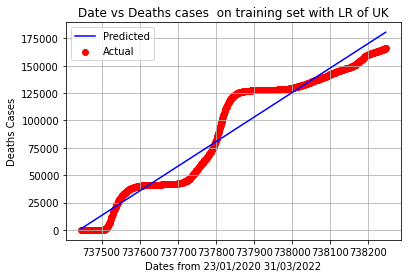

In [ ]:
#Over Confirmed Cases

# #For India
# plt.scatter(x_train_Confirmed_India,y_train_Confirmed_India, color='red')
# plt.plot(x_train_Confirmed_India, regressor.predict(x_train_Confirmed_India),color='blue')
# plt.title("Date vs confirmed cases  on training set with LR of India" , fontsize = 12)
# plt.legend([ 'Predicted','Actual'])
# plt.xlabel("Dates from 23/01/2020 31/03/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()

# #For US
# plt.scatter(x_train_Confirmed_US,y_train_Confirmed_US, color='red')
# plt.plot(x_train_Confirmed_US, regressor.predict(x_train_Confirmed_US),color='blue')
# plt.title("Date vs confirmed cases  on training set with LR of US" , fontsize = 12)
# plt.legend([ 'Predicted','Actual'])
# plt.xlabel("Dates from 23/01/2020 31/03/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()

# #For UK
# plt.scatter(x_train_Confirmed_United_Kingdom,y_train_Confirmed_United_Kingdom, color='red')
# plt.plot(x_train_Confirmed_United_Kingdom, regressor.predict(x_train_Confirmed_United_Kingdom),color='blue')
# plt.title("Date vs confirmed cases  on training set with LR of UK" , fontsize = 12)
# plt.legend([ 'Predicted','Actual'])
# plt.xlabel("Dates from 23/01/2020 31/03/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()

##########################
#over deaths

# For India
# plt.scatter(x_train_deaths_India,y_train_deaths_India, color='red')
# plt.plot(x_train_deaths_India, regressor.predict(x_train_deaths_India),color='blue')
# plt.title("Date vs Deaths cases  on training set with LR of India" , fontsize = 12)
# plt.xlabel("Dates from 23/01/2020 31/03/2022")
# plt.ylabel("Deaths Cases")
# plt.show()

# For US
# plt.scatter(x_train_deaths_US,y_train_deaths_US, color='red')
# plt.plot(x_train_deaths_US, regressor.predict(x_train_deaths_US),color='blue')
# plt.title("Date vs Deaths cases  on training set with LR of US" , fontsize = 12)
# plt.legend([ 'Predicted','Actual'])
# plt.xlabel("Dates from 23/01/2020 31/03/2022")
# plt.ylabel("Deaths Cases")
# plt.grid()
# plt.show()

#For UK
plt.scatter(x_train_deaths_United_Kingdom,y_train_deaths_United_Kingdom, color='red')
plt.plot(x_train_deaths_United_Kingdom, regressor.predict(x_train_deaths_United_Kingdom),color='blue')
plt.title("Date vs Deaths cases  on training set with LR of UK" , fontsize = 12)
plt.legend([ 'Predicted','Actual'])
plt.xlabel("Dates from 23/01/2020 31/03/2022")
plt.ylabel("Deaths Cases")
plt.grid()
plt.show()

# Visualizing the Test set

In [ ]:
# plt.scatter(x_test_Confirmed_Turkey,y_test_Confirmed_Turkey, color='red')
# plt.plot(x_test_Confirmed_Turkey, regressor.predict(x_test_Confirmed_Turkey),color='blue')
# plt.title("Dates vs Confirmed Cases")
# plt.xlabel("Dates")
# plt.ylabel("Confirmed Cases")
# plt.show()

# Actual vs predicted

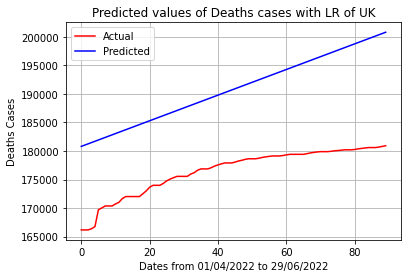

In [ ]:
# Actual vs predicted

#Over Confirmed Cases

# #For India
# plt.plot(y_test_Confirmed_India,color='red',linewidth = 3)
# plt.plot(y_pred_India,color='blue',linewidth = 3)
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of confirmed cases with LR of India" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# # plt.figure(figsize=(10,20))
# plt.show()

# #For US
# plt.plot(y_test_Confirmed_US,color='red')
# plt.plot(y_pred_US,color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of confirmed cases with LR of UK" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()

 #For UK

# plt.plot(y_test_Confirmed_United_Kingdom,color='red')
# plt.plot(y_pred_United_Kingdom,color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of confirmed cases with LR of UK" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()




####################################
# OverDeaths

#For India
# plt.plot(y_test_deaths_India,color='red')
# plt.plot(y_pred_LR,color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of Deaths cases with LR of India" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Deaths Cases")
# plt.show()


#For US
# plt.plot(y_test_deaths_US,color='red')
# plt.plot(y_pred_US,color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of Deaths cases with LR of US" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Deaths Cases")
# plt.grid()
# plt.show()

#FOR UK
plt.plot(y_test_deaths_United_Kingdom,color='red')
plt.plot(y_pred_United_Kingdom,color='blue')
plt.legend(['Actual', 'Predicted'])
plt.title("Predicted values of Deaths cases with LR of UK" , fontsize = 12)
plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
plt.ylabel("Deaths Cases")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

#Over Confirmed Cases

#For India
# R_square = r2_score(y_pred_India,y_test_Confirmed_India)
# mse=mean_squared_error(y_pred_India, y_test_Confirmed_India)
# mae=mean_absolute_error(y_pred_India, y_test_Confirmed_India)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant: ",  round(R_square,2))
# print("MSE of LinearRegression: ",  round(mse,2))
# print("MAE of LinearRegression: ",  round(mae,2))
# print("RMSE of LinearRegression: ",  round(rmse,2), '\n')

#For US
# R_square = r2_score(y_pred_US,y_test_Confirmed_US)
# mse=mean_squared_error(y_pred_US, y_test_Confirmed_US)
# mae=mean_absolute_error(y_pred_US, y_test_Confirmed_US)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant: ",  round(R_square,2))
# print("MSE of LinearRegression: ",  round(mse,2))
# print("MAE of LinearRegression: ",  round(mae,2))
# print("RMSE of LinearRegression: ",  round(rmse,2), '\n')

#For UK
# R_square = r2_score(y_pred_United_Kingdom,y_test_Confirmed_United_Kingdom)
# mse=mean_squared_error(y_pred_United_Kingdom, y_test_Confirmed_United_Kingdom)
# mae=mean_absolute_error(y_pred_United_Kingdom, y_test_Confirmed_United_Kingdom)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant: ",  round(R_square,2))
# print("MSE of LinearRegression: ",  round(mse,2))
# print("MAE of LinearRegression: ",  round(mae,2))
# print("RMSE of LinearRegression: ",  round(rmse,2), '\n')

#Over deaths cases
# For US
# R_square = r2_score(y_pred_US,y_test_deaths_US)
# mse=mean_squared_error(y_pred_US, y_test_deaths_US)
# mae=mean_absolute_error(y_pred_US, y_test_deaths_US)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant: ",  round(R_square,2))
# print("MSE of LinearRegression: ",  round(mse,2))
# print("MAE of LinearRegression: ",  round(mae,2))
# print("RMSE of LinearRegression: ",  round(rmse,2), '\n')

# # For UK
# R_square = r2_score(y_pred_United_Kingdom,y_test_deaths_United_Kingdom)
# mse=mean_squared_error(y_pred_United_Kingdom, y_test_deaths_United_Kingdom)
# mae=mean_absolute_error(y_pred_United_Kingdom, y_test_deaths_United_Kingdom)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant: ",  round(R_square,2))
# print("MSE of LinearRegression: ",  round(mse,2))
# print("MAE of LinearRegression: ",  round(mae,2))
# print("RMSE of LinearRegression: ",  round(rmse,2), '\n')

# For India
R_square = r2_score(y_pred_India,y_test_deaths_India)
mse=mean_squared_error(y_pred_India, y_test_deaths_India)
mae=mean_absolute_error(y_pred_India, y_test_deaths_India)
rmse = np.sqrt(mse)

print("Coefficients of determinant: ",  round(R_square,2))
print("MSE of LinearRegression: ",  round(mse,2))
print("MAE of LinearRegression: ",  round(mae,2))
print("RMSE of LinearRegression: ",  round(rmse,2), '\n')

Coefficients of determinant:  -9.05
MSE of LinearRegression:  4367720861.26
MAE of LinearRegression:  63088.48
RMSE of LinearRegression:  66088.73 



# Confirmed and Death cases in Turkey

In [ ]:
# Confirmed, Recovered, Active and Death cases in Turkey
# dates = top_10_confirmed_Turkey['Date'][:]

# Turkey_df=top_10_confirmed_Turkey[top_10_confirmed_Turkey['Country'] == 'Turkey'].iloc[:,:]

# plt.figure(figsize= (20,10))
# plt.xticks(rotation = 60 ,fontsize = 11)
# plt.yticks(fontsize = 10)
# plt.xlabel("Dates",fontsize = 20)
# plt.ylabel('Number of cases',fontsize = 20)
# plt.title("Confirmed, Deaths cases in Turkey" , fontsize = 20)

# ax1 = plt.plot_date(y= Turkey_df['Confirmed'].values,x= dates,label = 'Confirmed',linestyle ='-',color = 'cyan')
# # ax2 = plt.plot_date(y= iran_df['Recovered'].values,x= dates,label = 'Recovered',linestyle ='-',color = 'lawngreen')
# ax3 = plt.plot_date(y= Turkey_df['Deaths'].values,x= dates,label = 'Death',linestyle ='-',color = 'orange')
# # ax4 = plt.plot_date(y= iran_df['Active'].values,x= dates,label = 'Active',linestyle ='-',color = 'purple')
# plt.legend()

# Support vector machine regressor

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Over Confirmed Cases

#For India

# sc_X_train_India = StandardScaler()
# sc_y_train_India = StandardScaler()
# sc_X_text_India = StandardScaler()
# sc_y_text_India = StandardScaler()

# Sx_train_India = sc_X_train_India.fit_transform(x_train_Confirmed_India)
# Sy_train_India = sc_y_train_India.fit_transform(y_train_Confirmed_India)

# Sx_test_India = sc_X_text_India.fit_transform(x_test_Confirmed_India)
# Sy_test_India = sc_y_text_India.fit_transform(y_test_Confirmed_India)


# #For US
# sc_X_train_US = StandardScaler()
# sc_y_train_US = StandardScaler()
# sc_X_text_US = StandardScaler()
# sc_y_text_US = StandardScaler()

# Sx_train_US = sc_X_train_US.fit_transform(x_train_Confirmed_US)
# Sy_train_US = sc_y_train_US.fit_transform(y_train_Confirmed_US)

# Sx_test_US = sc_X_text_US.fit_transform(x_test_Confirmed_US)
# Sy_test_US = sc_y_text_US.fit_transform(y_test_Confirmed_US)

# #For UK
# sc_X_train_United_Kingdom = StandardScaler()
# sc_y_train_United_Kingdom = StandardScaler()
# sc_X_text_United_Kingdom = StandardScaler()
# sc_y_text_United_Kingdom = StandardScaler()

# Sx_train_United_Kingdom = sc_X_train_United_Kingdom.fit_transform(x_train_Confirmed_United_Kingdom)
# Sy_train_United_Kingdom = sc_y_train_United_Kingdom.fit_transform(y_train_Confirmed_United_Kingdom)

# Sx_test_United_Kingdom = sc_X_text_United_Kingdom.fit_transform(x_test_Confirmed_United_Kingdom)
# Sy_test_United_Kingdom = sc_y_text_United_Kingdom.fit_transform(y_test_Confirmed_United_Kingdom)

################################
#overdeaths

##For US
# sc_X_train_US = StandardScaler()
# sc_y_train_US = StandardScaler()
# sc_X_test_US = StandardScaler()
# sc_y_test_US = StandardScaler()

# Sx_train_US = sc_X_train_US.fit_transform(x_train_deaths_US)
# Sy_train_US = sc_y_train_US.fit_transform(y_train_deaths_US)

# Sx_test_US = sc_X_test_US.fit_transform(x_test_deaths_US)
# Sy_test_US = sc_y_test_US.fit_transform(y_test_deaths_US)




#For UK
# from sklearn.preprocessing import StandardScaler
# sc_X_train_United_Kingdom = StandardScaler()
# sc_y_train_United_Kingdom = StandardScaler()
# sc_X_text_United_Kingdom = StandardScaler()
# sc_y_text_United_Kingdom = StandardScaler()

# Sx_train_United_Kingdom = sc_X_train_United_Kingdom.fit_transform(x_train_deaths_United_Kingdom)
# Sy_train_United_Kingdom = sc_y_train_United_Kingdom.fit_transform(y_train_deaths_United_Kingdom)

# Sx_test_United_Kingdom = sc_X_text_United_Kingdom.fit_transform(x_test_deaths_United_Kingdom)
# Sy_test_United_Kingdom = sc_y_text_United_Kingdom.fit_transform(y_test_deaths_United_Kingdom)

#For India
# from sklearn.preprocessing import StandardScaler
sc_X_train_India = StandardScaler()
sc_y_train_India = StandardScaler()
sc_X_text_India = StandardScaler()
sc_y_text_India = StandardScaler()

Sx_train_India = sc_X_train_India.fit_transform(x_train_deaths_India)
Sy_train_India = sc_y_train_India.fit_transform(y_train_deaths_India)

Sx_test_India = sc_X_text_India.fit_transform(x_test_deaths_India)
Sy_test_India = sc_y_text_India.fit_transform(y_test_deaths_India)

In [ ]:
#Over Confirmed Cases

#For India
# Sx_train_India
# Sy_train_India
# Sx_test_India
# Sy_test_India
# Sy_test_India_1D_array = np.ravel(Sy_test_India)
# Sy_test_India_1D_array

# For US
# Sx_train_US
# Sy_train_US
# Sx_test_US
# Sy_test_US_1D_array = np.ravel(Sy_test_US)
# Sy_test_US_1D_array

# For UK

# Sx_train_United_Kingdom
# Sy_train_United_Kingdom
# Sx_test_United_Kingdom
# Sy_test_United_Kingdom
# Sy_test_United_Kingdom_1D_array = np.ravel(Sy_test_United_Kingdom)
# Sy_test_United_Kingdom_1D_array

# Over deaths Cases:
# #For US:
# # Sx_train_US
# # Sy_train_US
# # Sx_test_US
# Sy_test_US
# Sy_test_US_1D_array = np.ravel(Sy_test_US)
# Sy_test_US_1D_array

#For US:
# Sx_train_US
# Sy_train_US
# Sx_test_US
# Sy_test_United_Kingdom
# Sy_test_United_Kingdom_1D_array = np.ravel(Sy_test_United_Kingdom)
# Sy_test_United_Kingdom_1D_array

Sy_test_India
Sy_test_India_1D_array = np.ravel(Sy_test_India)
Sy_test_India_1D_array

array([-1.94700669, -1.88311668, -1.87286272, -1.82711431, -1.77111195,
       -1.73719503, -1.7032781 , -1.63781055, -1.61493635, -1.61020376,
       -1.59521721, -1.5747093 , -1.57392053, -1.56918794, -1.56603288,
       -1.56287782, -1.39408196, -1.3932932 , -1.36174257, -1.31757169,
       -1.27497835, -1.24894908, -1.21424339, -1.19058042, -1.19058042,
       -0.06185676, -0.0310949 ,  0.01623104,  0.05566933,  0.08721995,
        0.10772786,  0.12350317,  0.14795491,  0.19133702,  0.21263369,
        0.22998654,  0.26153717,  0.28441137,  0.29229903,  0.33489237,
        0.35382275,  0.36092164,  0.36959806,  0.37985202,  0.40114869,
        0.41613524,  0.4421645 ,  0.45005216,  0.46582747,  0.48554661,
        0.53681638,  0.5730996 ,  0.59755134,  0.61096036,  0.62515814,
        0.63620086,  0.66223012,  0.67327284,  0.69299198,  0.70797853,
        0.71271113,  0.71665495,  0.72454261,  0.74505052,  0.756882  ,
        0.76398089,  0.76950225,  0.77502361,  0.78133374,  0.80

In [ ]:
#Training the SVR model on the Training dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

#Over Confirmed Cases

# For India
# regressor.fit(Sx_train_India,Sy_train_India)

# For US
# regressor.fit(Sx_train_US,Sy_train_US)

#For United_Kingdom
# regressor.fit(Sx_train_United_Kingdom,Sy_train_United_Kingdom)

###################
#Over Deaths Cases
#for India
regressor.fit(Sx_train_India,Sy_train_India)

#for US
# regressor.fit(Sx_train_US,Sy_train_US)

#for UK
# regressor.fit(Sx_train_United_Kingdom,Sy_train_United_Kingdom)

SVR()

In [ ]:
# regressor.score(Sx__train_Turkey,Sy_train_Turkey)*100

In [ ]:
#Predicting the Test Results

#Over Confirmed Cases

# #For India
# y_pred_svm_India = regressor.predict(Sx_test_India)
# y_pred_svm_India

#For US
# y_pred_svm_US = regressor.predict(Sx_test_US)
# y_pred_svm_US

#For UK
# y_pred_svm_United_Kingdom = regressor.predict(Sx_test_United_Kingdom)
# y_pred_svm_United_Kingdom
################################
#Over Death cases

#For India
y_pred_svm_India = regressor.predict(Sx_test_India)
y_pred_svm_India

#For US
# y_pred_svm_US = regressor.predict(Sx_test_US)
# y_pred_svm_US

#For US
# y_pred_svm_United_Kingdom = regressor.predict(Sx_test_United_Kingdom)
# y_pred_svm_United_Kingdom

array([-1.12174162, -1.16046387, -1.19558835, -1.22663097, -1.25313724,
       -1.27469459, -1.29094478, -1.30159595, -1.30643388, -1.30533216,
       -1.29826061, -1.28529182, -1.26660511, -1.24248791, -1.21333398,
       -1.17963852, -1.14198998, -1.10105862, -1.05758191, -1.01234717,
       -0.96617166, -0.91988076, -0.87428473, -0.83015484, -0.78819954,
       -0.74904153, -0.71319652, -0.68105443, -0.65286393, -0.62872084,
       -0.60856101, -0.59215818, -0.57912703, -0.5689315 , -0.56089843,
       -0.55423605, -0.54805698, -0.54140515, -0.53328561, -0.52269658,
       -0.5086624 , -0.49026656, -0.46668338, -0.43720746, -0.40127969,
       -0.35850887, -0.30868823, -0.25180602, -0.18804986, -0.11780462,
       -0.04164371,  0.03968578,  0.12528382,  0.21412318,  0.30507951,
        0.39696446,  0.48856103,  0.57865961,  0.66609367,  0.74977384,
        0.82871916,  0.9020845 ,  0.96918328,  1.02950471,  1.08272508,
        1.12871276,  1.16752696,  1.19941027,  1.22477544,  1.24

In [ ]:
#Compare the Test set with Predicted Values:
#For India
# df_svm_compare_India = pd.DataFrame({'Real Values' : Sy_test_India_1D_array,'Predicted Values':y_pred_svm_India})
# df_svm_compare_India

# #For Us
# df_svm_compare_US = pd.DataFrame({'Real Values' : Sy_test_US_1D_array,'Predicted Values':y_pred_svm_US})
# df_svm_compare_US

# #For UK
# df_svm_compare_United_Kingdom = pd.DataFrame({'Real Values' : Sy_test_United_Kingdom_1D_array,'Predicted Values':y_pred_svm_United_Kingdom})
# df_svm_compare_United_Kingdom

#############################
#Over Deaths cases
# For UK
# df_svm_compare_United_Kingdom = pd.DataFrame({'Real Values' : Sy_test_United_Kingdom_1D_array,'Predicted Values':y_pred_svm_United_Kingdom})
# df_svm_compare_United_Kingdom

# For US
# df_svm_compare_US = pd.DataFrame({'Real Values' : Sy_test_US_1D_array,'Predicted Values':y_pred_svm_US})
# df_svm_compare_US

,Real Values,Predicted Values
0,-2.572930,-1.822453
1,-2.572930,-1.784007
2,-2.572930,-1.739182
3,-2.520602,-1.689005
4,-2.427657,-1.634599
...,...,...
85,1.023021,1.292675
86,1.023021,1.304441
87,1.043952,1.310552
88,1.073107,1.310900


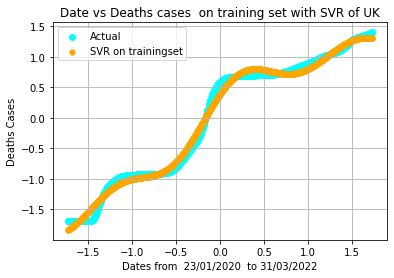

In [ ]:

#Over Confirmed Cases
# #For India
# plt.scatter(Sx_train_India,Sy_train_India, color='cyan')
# plt.scatter(Sx_train_India,regressor.predict(Sx_train_India), color = 'orange', linewidth= 0.3)
# plt.title("Date vs confirmed cases  on training set with SVR of India" , fontsize = 12)
# plt.legend(['Actual','Predicted'])
# plt.xlabel("Dates from  23/01/2020  to 31/03/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()

# #For US
# plt.scatter(Sx_train_US,Sy_train_US, color='cyan')
# plt.scatter(Sx_train_US,regressor.predict(Sx_train_US), color = 'orange', linewidth= 0.3)
# plt.title("Date vs confirmed cases  on training set with SVR of US" , fontsize = 12)
# plt.legend(['Actual','SVM pred on trainingset'])
# plt.xlabel("Dates from  23/01/2020  to 31/03/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()

# #For UK
# plt.scatter(Sx_train_United_Kingdom,Sy_train_United_Kingdom, color='cyan')
# plt.scatter(Sx_train_United_Kingdom,regressor.predict(Sx_train_United_Kingdom), color = 'orange', linewidth= 0.3)
# plt.title("Date vs confirmed cases  on training set with SVR of UK" , fontsize = 12)
# plt.legend(['Actual','SVR pred on trainingset'])
# plt.xlabel("Dates from  23/01/2020  to 31/03/2022")
# plt.grid()
# plt.ylabel("Confirmed Cases")
# plt.show()



###############

#Over Deaths Cases

#For US
# plt.scatter(Sx_train_US,Sy_train_US, color='cyan')
# plt.scatter(Sx_train_US,regressor.predict(Sx_train_US), color = 'orange', linewidth= 0.3)
# plt.title("Date vs Deaths cases  on training set with SVR of US" , fontsize = 12)
# plt.legend(['Actual','SVR on trainingset'])
# plt.xlabel("Dates from  23/01/2020  to 31/03/2022")
# plt.ylabel("Deaths Cases")
# plt.grid()
# plt.show()

#FOR UK
plt.scatter(Sx_train_United_Kingdom,Sy_train_United_Kingdom, color='cyan')
plt.scatter(Sx_train_United_Kingdom,regressor.predict(Sx_train_United_Kingdom), color = 'orange', linewidth= 0.3)
plt.title("Date vs Deaths cases  on training set with SVR of UK" , fontsize = 12)
plt.legend(['Actual','SVR on trainingset'])
plt.xlabel("Dates from  23/01/2020  to 31/03/2022")
plt.ylabel("Deaths Cases")
plt.grid()
plt.show()



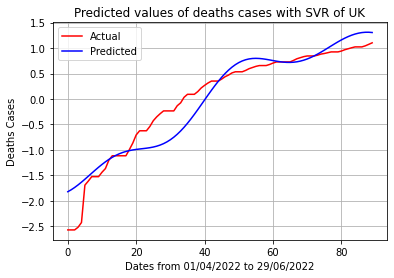

In [ ]:
# Actual vs Predicted

#Over Confirmed Cases

# #For India
# plt.figure(figsize = (12,6))
# plt.plot(Sy_test_India_1D_array,color='red')
# plt.plot(y_pred_svm_India, linestyle = 'dashed', color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of confirmed cases with SVR of India" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Confirmed Cases")
# # plt.xticks(size = 15)
# # plt.yticks(size = 15)
# plt.grid()
# plt.show()


# #For US
# plt.figure(figsize = (12,6))
# plt.plot(Sy_test_US_1D_array,color='red')
# plt.plot(y_pred_svm_US,color='blue',linestyle = 'dashed')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of confirmed cases with SVR of US" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()



# #For UK
# plt.plot(Sy_test_United_Kingdom_1D_array,color='red')
# plt.plot(y_pred_svm_United_Kingdom,color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of confirmed cases with SVR of UK" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Confirmed Cases")
# plt.grid()
# plt.show()


# mae=mean_absolute_error(y_pred_svm_United_Kingdom, Sy_test_United_Kingdom)
# mse=mean_squared_error(y_pred_svm_United_Kingdom, Sy_test_United_Kingdom)
# rmse = np.sqrt(mse)
# print("RMSE of SVM ", round(rmse,2))
# print("MAE of SVM ", round(mae,2), '\n')

######################
#For Deaths

#For India
# plt.plot(Sy_test_India,color='red')
# plt.plot(y_pred_svm_India,color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of deaths cases with SVR of India" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Deaths Cases")
# plt.show()
# plt.show()

# #For US
# plt.plot(Sy_test_US,color='red')
# plt.plot(y_pred_svm_US,color='blue')
# plt.legend(['Actual', 'Predicted'])
# plt.title("Predicted values of deaths cases with SVR of US" , fontsize = 12)
# plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
# plt.ylabel("Deaths Cases")
# plt.grid()
# plt.show()

#For UK
plt.plot(Sy_test_United_Kingdom,color='red')
plt.plot(y_pred_svm_United_Kingdom,color='blue')
plt.legend(['Actual', 'Predicted'])
plt.title("Predicted values of deaths cases with SVR of UK" , fontsize = 12)
plt.xlabel("Dates from 01/04/2022 to 29/06/2022")
plt.ylabel("Deaths Cases")
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import r2_score

#Over Confirmed Cases

#For India
# R_square = r2_score(y_pred_svm_India,Sy_test_India_1D_array)
# mse=mean_squared_error(y_pred_svm_India, Sy_test_India_1D_array)
# mae=mean_absolute_error(y_pred_svm_India, Sy_test_India_1D_array)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant or R_square: ",  round(R_square,2))
# print("MSE of SVR: ",  round(mse,2))
# print("MAE of SVR: ",  round(mae,2))
# print("RMSE of SVR: ",  round(rmse,2), '\n')

#For US
# R_square = r2_score(y_pred_svm_US,Sy_test_US_1D_array)
# mse=mean_squared_error(y_pred_svm_US, Sy_test_US_1D_array)
# mae=mean_absolute_error(y_pred_svm_US, Sy_test_US_1D_array)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant or R_square: ",  round(R_square,2))
# print("MSE of SVR: ",  round(mse,2))
# print("MAE of SVR: ",  round(mae,2))
# print("RMSE of SVR: ",  round(rmse,2), '\n')

# # For UK
# R_square = r2_score(y_pred_svm_United_Kingdom,Sy_test_United_Kingdom_1D_array)
# mse=mean_squared_error(y_pred_svm_United_Kingdom, Sy_test_United_Kingdom_1D_array)
# mae=mean_absolute_error(y_pred_svm_United_Kingdom, Sy_test_United_Kingdom_1D_array)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant or R_square: ",  round(R_square,2))
# print("MSE of SVR: ",  round(mse,2))
# print("MAE of SVR: ",  round(mae,2))
# print("RMSE of SVR: ",  round(rmse,2), '\n')

#Over Deaths Cases

# # For US
# R_square = r2_score(y_pred_svm_US,Sy_test_US_1D_array)
# mse=mean_squared_error(y_pred_svm_US, Sy_test_US_1D_array)
# mae=mean_absolute_error(y_pred_svm_US, Sy_test_US_1D_array)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant or R_square: ",  round(R_square,2))
# print("MSE of SVR: ",  round(mse,2))
# print("MAE of SVR: ",  round(mae,2))
# print("RMSE of SVR: ",  round(rmse,2), '\n')

# # For UK
# R_square = r2_score(y_pred_svm_United_Kingdom,Sy_test_United_Kingdom_1D_array)
# mse=mean_squared_error(y_pred_svm_United_Kingdom, Sy_test_United_Kingdom_1D_array)
# mae=mean_absolute_error(y_pred_svm_United_Kingdom, Sy_test_United_Kingdom_1D_array)
# rmse = np.sqrt(mse)

# print("Coefficients of determinant or R_square: ",  round(R_square,2))
# print("MSE of SVR: ",  round(mse,2))
# print("MAE of SVR: ",  round(mae,2))
# print("RMSE of SVR: ",  round(rmse,2), '\n')

# For India
R_square = r2_score(y_pred_svm_India,Sy_test_India_1D_array)
mse=mean_squared_error(y_pred_svm_India, Sy_test_India_1D_array)
mae=mean_absolute_error(y_pred_svm_India, Sy_test_India_1D_array)
rmse = np.sqrt(mse)

print("Coefficients of determinant or R_square: ",  round(R_square,2))
print("MSE of SVR: ",  round(mse,2))
print("MAE of SVR: ",  round(mae,2))
print("RMSE of SVR: ",  round(rmse,2), '\n')

Coefficients of determinant or R_square:  0.72
MSE of SVR:  0.27
MAE of SVR:  0.48
RMSE of SVR:  0.52 



# Logistic Regression Model

In [ ]:
# Sx_train_India
# Sy_train_India
# Sx_test_India
# Sy_test_India

In [ ]:
# from sklearn import preprocessing
# from sklearn import utils


# print(utils.multiclass.type_of_target(Sx_train_India))

# lab_enc = preprocessing.LabelEncoder()
# Sx_train_India_encoded = lab_enc.fit_transform(Sx_train_India)
# Sy_train_India_encoded = lab_enc.fit_transform(Sy_train_India)

# Sx_test_India_encoded = lab_enc.fit_transform(Sx_test_India)



# print(utils.multiclass.type_of_target(Sy_train_India_encoded))

# # Sy_train_India_encoded
# Sx_train_India_encoded = Sx_train_India_encoded.reshape(-1,1)
# Sy_train_India_encoded = Sy_train_India_encoded.reshape(-1,1)

# Sx_test_India_encoded = Sx_test_India_encoded.reshape(-1,1)



# Sx_train_India_encoded
# Sy_train_India_encoded









In [ ]:
#Implementing Logistic Regression using sklearn
# from sklearn.linear_model import LogisticRegression
# modelLogistic = LogisticRegression()
# modelLogistic.fit(Sx_train_India_encoded,Sy_train_India_encoded)

In [ ]:
#Make prediction for the test data

# y_pred= modelLogistic.predict(Sx_test_India_encoded)
# y_pred

In [ ]:
#over Confirmed  cases:

# #For India
# a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
# b = [0,0,0.01,0.08,0.16,00.28,0.5,0.66,0.8,0.9,0.95,0.99,1,1]
# b = np.array(b)


In [ ]:
# b

In [ ]:
# ne_a = a[2:-2]
# ne_b = np.array(b[2:-2]) # Getting rid of 0 and 1 values

# ne_b = np.log((1 / ne_b) - 1)
# ne_b
# ne_a

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# model = LinearRegression()
# model.fit(ne_a.reshape(-1, 1), ne_b.reshape(-1, 1))
# alpha = model.coef_[0, 0]
# beta = model.predict([[0]])[0, 0]

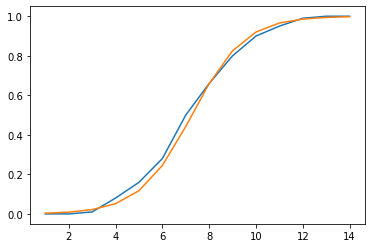

In [ ]:
# predicted = 1 / (1 + np.exp(alpha * a + beta))
# plt.figure()
# plt.plot(a, b)
# plt.plot(a, predicted)
# plt.show()

In [ ]:
top_10_confirmed_United_Kingdom_train
x_train_Confirmed_United_Kingdom = top_10_confirmed_United_Kingdom_train.iloc[:, 1].values
x_train_Confirmed_United_Kingdom
print("Size of the array: ", x_train_Confirmed_United_Kingdom.size)
print("Length of one array element in bytes: ", x_train_Confirmed_United_Kingdom.itemsize)
ne_a = x_train_Confirmed_United_Kingdom[2:-2]
print("Size of the array ne_a: ", ne_a.size)
print("Length of one array ne_a element in bytes: ", ne_a.itemsize)
# ne_a
# y_train_Confirmed_United_Kingdom = top_10_confirmed_United_Kingdom_train.iloc[:, 3].values.reshape(-1, 1)

Size of the array:  799
Length of one array element in bytes:  8
Size of the array ne_a:  795
Length of one array ne_a element in bytes:  8


In [ ]:

import numpy as np

from sklearn import preprocessing

y_train_Confirmed_United_Kingdom = top_10_confirmed_United_Kingdom_train.iloc[:, 3].values
y_train_Confirmed_United_Kingdom

normalized_y= y_train_Confirmed_United_Kingdom/np.linalg.norm(y_train_Confirmed_United_Kingdom)

# print(normalized_y)
normalized_y
# arr = np.ravel(normalized_y)
# Predicted_value = np.round(arr, 2)
# Predicted_value
ne_b = normalized_y[2:-2] # Getting rid of 0 and 1 values
ne_b

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.37714704e-09, 9.37714704e-09,
       9.37714704e-09, 3.75085882e-08, 3.75085882e-08, 4.21971617e-08,
       4.21971617e-08, 4.21971617e-08, 6.09514558e-08, 6.56400293e-08,
       6.56400293e-08, 7.03286028e-08, 7.50171763e-08, 7.97057498e-08,
       8.43943233e-08, 8.43943233e-08, 8.43943233e-08, 8.90828969e-08,
       8.90828969e-08, 9.37714704e-08, 1.03148617e-07, 1.07837191e-07,
       1.07837191e-07, 1.31280059e-07, 1.40657206e-07, 1.59411500e-07,
       1.73477220e-07, 2.06297235e-07, 2.62560117e-07, 2.86002985e-07,
       4.40725911e-07, 6.28268852e-07, 8.86140395e-07, 1.15338909e-06,
       1.38312919e-06, 1.75352650e-06, 2.01139804e-06, 2.26458101e-06,
       2.95380132e-06, 4.16345329e-06, 6.09045700e-06, 8.38316945e-06,
       1.06336847e-05, 1.23403255e-05, 1.44126750e-05, 1.72820820e-05,
       2.08922836e-05, 2.56089886e-05, 3.05835651e-05, 3.64677248e-05,
      

In [ ]:
ne_b = np.log((1 / ne_b) - 1)
ne_b

array([        inf,         inf,         inf,         inf,         inf,
               inf, 18.48499026, 18.48499026, 18.48499026, 17.09869588,
       17.09869588, 16.98091283, 16.98091283, 16.98091283, 16.61318804,
       16.53908006, 16.53908006, 16.47008718, 16.40554866, 16.34492403,
       16.28776561, 16.28776561, 16.28776561, 16.23369839, 16.23369839,
       16.18240509, 16.0870949 , 16.04264313, 16.04264313, 15.84593281,
       15.77693993, 15.65177677, 15.56721937, 15.39394761, 15.1527855 ,
       15.0672633 , 14.63484223, 14.28029703, 13.93638955, 13.67280477,
       13.49116071, 13.2538799 , 13.11667852, 12.99811854, 12.73241468,
       12.38916155, 12.00878135, 11.68927612, 11.45147316, 11.30262582,
       11.14738812, 10.96582303, 10.77610978, 10.57254154, 10.3950172 ,
       10.21904647, 10.07589716,  9.92871994,  9.72502646,  9.553037  ,
        9.38846307,  9.22776347,  9.0837921 ,  8.97238349,  8.87074581,
        8.73650581,  8.61208938,  8.49157111,  8.38459802,  8.28

In [ ]:
model = LinearRegression()
model.fit(ne_a.reshape(-1, 1), ne_b.reshape(-1, 1))
alpha = model.coef_[0, 0]
beta = model.predict([[0]])[0, 0]

ValueError: ignored